## Loan_Approval_Prediction

Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
# Description of the numeric values

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


Filling Missing Values

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# There are total 7 columns where the data is missing 

# Fill this values with 'mode' for 'categorical' and 'mean' for 'numerical' columns''''''

In [8]:
# 4 columns 'Gender', 'Married', 'Dependents', 'Self_Employed' will fill with the mode

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)


In [9]:
# 3 'Credit_History', 'Loan_Amount_Term', 'LoanAmount' columns will fill with the mean()

data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)


In [10]:
data.duplicated().sum()

0

In [11]:
# Also checked for duplicate values but not any duplicate value is found

Dropping Columns

In [12]:
# In order to predict the data need to drop some columns which are not required for prediction

data.drop('Loan_ID', axis=1, inplace=True)

## EDA & Data Visualization

In [13]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
420,Male,Yes,0,Graduate,No,5829,0.000000,138.0,360.0,1.0,Rural,Y
297,Female,Yes,1,Graduate,No,4666,0.000000,135.0,360.0,1.0,Urban,Y
40,Male,No,0,Graduate,No,3600,0.000000,80.0,360.0,1.0,Urban,N
554,Male,Yes,0,Graduate,No,3593,4266.000000,132.0,180.0,0.0,Rural,N
282,Male,Yes,2,Graduate,No,2301,985.799988,78.0,180.0,1.0,Urban,Y


Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:ylabel='Loan_Status'>

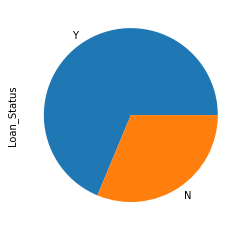

In [14]:
print(data['Loan_Status'].value_counts())

data['Loan_Status'].value_counts().plot(kind='pie',)

In [15]:
# almost 75% of Loan Status is converting to the Yes
# will check it with the indivisual columns

<AxesSubplot:xlabel='Gender', ylabel='count'>

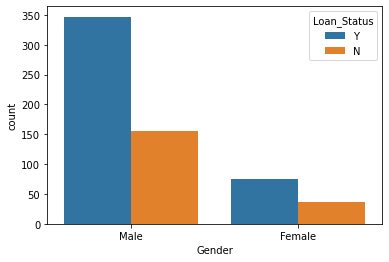

In [16]:
sns.countplot(x = data['Gender'], hue=data['Loan_Status'])

In [17]:
# there is no major difference is found based on gender almost 50% loan is rejected of both male & female

<AxesSubplot:xlabel='Education', ylabel='count'>

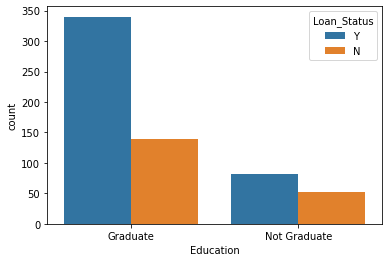

In [18]:
sns.countplot(x = data['Education'], hue=data['Loan_Status'])

In [19]:
# in the above visualzation we can see that most of the non graduate's loan had been rejected

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

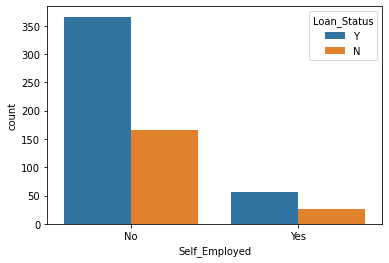

In [20]:
sns.countplot(x = data['Self_Employed'], hue=data['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

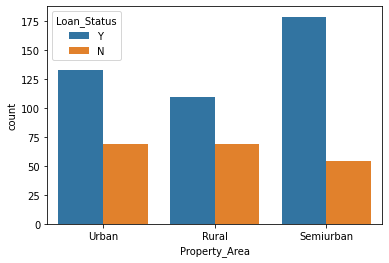

In [21]:
sns.countplot(x = data['Property_Area'], hue=data['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

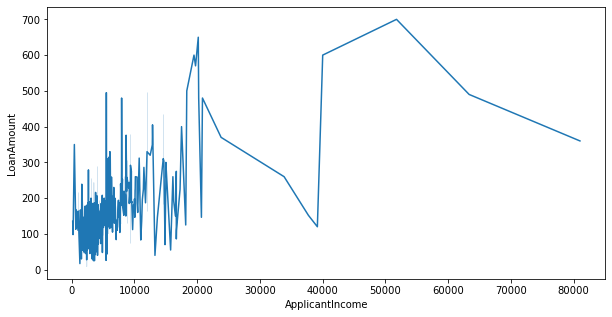

In [22]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data['ApplicantIncome'], y=data['LoanAmount'])


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

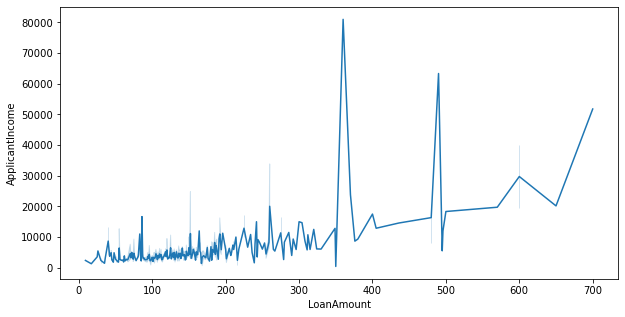

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data['LoanAmount'], y=data['ApplicantIncome'])



In [24]:
# in the above visualization loan amount has decreases as the income increases may might be because of Outliers...

## Outliers Detection & Removal

In [25]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

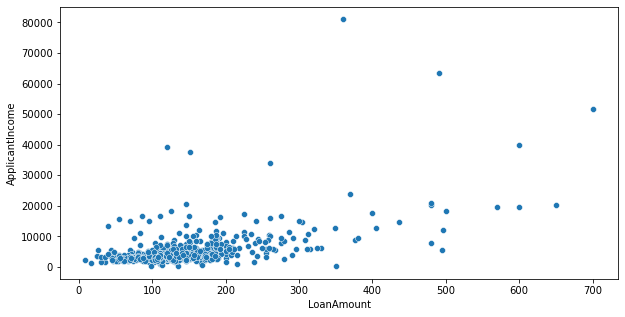

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = data['LoanAmount'], y = data['ApplicantIncome'])



<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

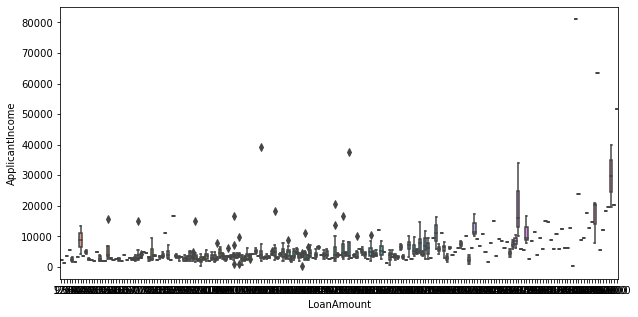

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x = data['LoanAmount'], y=data['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome'>

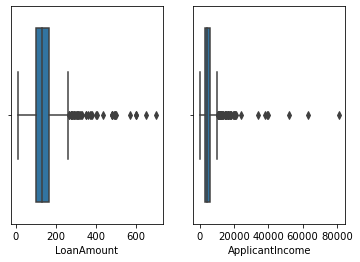

In [28]:
plt.subplot(1, 2, 1)
sns.boxplot(x = data['LoanAmount'])

plt.subplot(1, 2, 2)
sns.boxplot(x = data['ApplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term'>

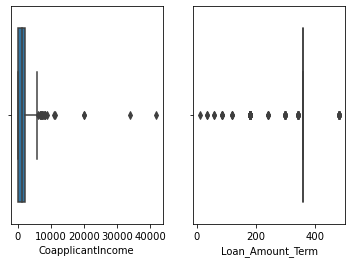

In [29]:
plt.subplot(1, 2, 1)
sns.boxplot(x = data['CoapplicantIncome'])

plt.subplot(1, 2, 2)
sns.boxplot(x = data['Loan_Amount_Term'])


In [30]:
# In the above plots we can clearly see that there are few outliers we have to remove it

In [31]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [32]:
data = data[(data['ApplicantIncome'] < 20000) & (data['ApplicantIncome'] > 1000)]

In [33]:
# Because of we have very less data that why we will remove only this 7 rows of column

In [34]:
data = data[(data['LoanAmount'] < 400) & (data['LoanAmount'] > 10)]

In [35]:
data = data[data['Loan_Amount_Term'] > 20]

In [36]:
data.shape

(585, 12)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

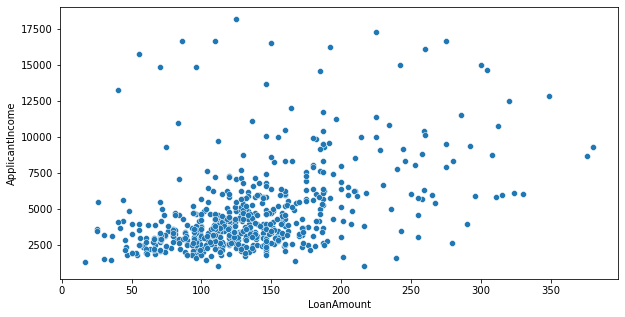

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = data['LoanAmount'], y = data['ApplicantIncome'])



<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

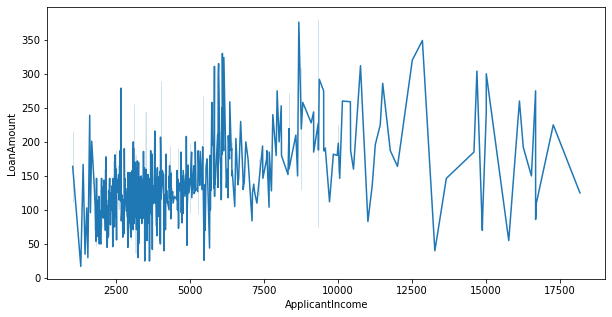

In [38]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data['ApplicantIncome'], y=data['LoanAmount'])


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

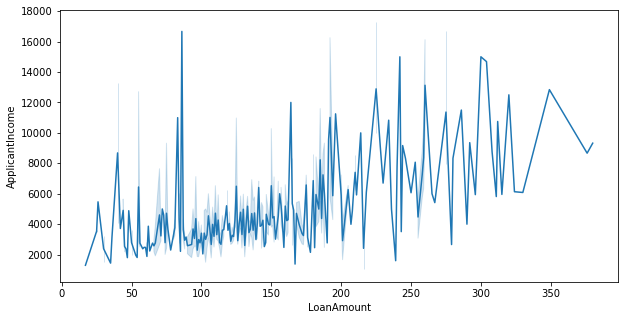

In [39]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data['LoanAmount'], y=data['ApplicantIncome'])



## Feature encoding

In [40]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
167,Male,Yes,0,Graduate,No,2439,3333.0,129.0,360.0,1.0,Rural,Y
148,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural,N
434,Male,No,0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban,Y
250,Male,Yes,0,Not Graduate,No,1668,3890.0,201.0,360.0,0.0,Semiurban,N
182,Male,Yes,0,Graduate,No,4600,0.0,73.0,180.0,1.0,Semiurban,Y


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             585 non-null    object 
 1   Married            585 non-null    object 
 2   Dependents         585 non-null    object 
 3   Education          585 non-null    object 
 4   Self_Employed      585 non-null    object 
 5   ApplicantIncome    585 non-null    int64  
 6   CoapplicantIncome  585 non-null    float64
 7   LoanAmount         585 non-null    float64
 8   Loan_Amount_Term   585 non-null    float64
 9   Credit_History     585 non-null    float64
 10  Property_Area      585 non-null    object 
 11  Loan_Status        585 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 59.4+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

data['Gender'] = le.fit_transform(data['Gender'])

data['Married'] = le.fit_transform(data['Married'])

data['Education'] = le.fit_transform(data['Education'])

data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [43]:

data['Dependents'] = data['Dependents'].replace({'3+' : '3'})

In [44]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [45]:
data['Property_Area'].value_counts()

1    223
2    193
0    169
Name: Property_Area, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             585 non-null    int32  
 1   Married            585 non-null    int32  
 2   Dependents         585 non-null    object 
 3   Education          585 non-null    int32  
 4   Self_Employed      585 non-null    int32  
 5   ApplicantIncome    585 non-null    int64  
 6   CoapplicantIncome  585 non-null    float64
 7   LoanAmount         585 non-null    float64
 8   Loan_Amount_Term   585 non-null    float64
 9   Credit_History     585 non-null    float64
 10  Property_Area      585 non-null    int32  
 11  Loan_Status        585 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 45.7+ KB


In [47]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [48]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=5)

In [49]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()

Xtrain_scaled = sd.fit_transform(Xtrain)
Xtest_scaled = sd.fit_transform(Xtest)

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(Xtrain, ytrain)

D:\Bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
ypred = lr.predict(Xtest)

In [71]:
ypred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0])

In [72]:
ytest

465    1
242    1
515    1
396    0
472    1
      ..
398    1
277    1
461    1
289    1
307    0
Name: Loan_Status, Length: 117, dtype: int32

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [74]:
accuracy_score(ytest, ypred)

0.8632478632478633

In [75]:
confusion_matrix(ytest, ypred)

array([[14, 15],
       [ 1, 87]], dtype=int64)